In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime

In [2]:
vaccination = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=30").json()
#pprint(vaccination)
len(vaccination)

213

In [3]:
vaccine_days = []

vaccine_keys = vaccination[0]["timeline"].keys()

for value in vaccine_keys:
    vaccine_days.append(value)

#vaccine_days

In [4]:
country = []
vaccine =[]
v_date = []
for i in range(len(vaccination)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine.append(vaccination[i]["timeline"][j])
            country.append(vaccination[i]["country"])
            v_date.append(j)
        except:
            pass



In [5]:
len(country)

6366

In [6]:
len(vaccine)

6366

In [7]:
len(v_date)

6366

In [8]:
world_vaccination_df = pd.DataFrame({
                                "Country" : country,
                                "Date" : v_date,
                                "Vaccination_count" : vaccine
    
})

world_vaccination_df.head(2)

,Country,Date,Vaccination_count
0,Afghanistan,6/30/21,886854
1,Afghanistan,7/1/21,900969


In [9]:
world_data = requests.get("https://disease.sh/v3/covid-19/historical/").json()
#pprint(world_data)

In [10]:
len(world_data)

279

In [11]:
world_days = []

world_keys = world_data[0]["timeline"]['cases'].keys()

for value in world_keys:
    world_days.append(value)

#world_days

In [12]:
country = []
cases =[]
deaths = []
recovered = []
w_date = []
for i in range(len(world_data)): 
       
    
    for j in world_days:
        
        try:
             
            cases.append(world_data[i]['timeline']['cases'][j])
            deaths.append(world_data[i]['timeline']['deaths'][j])
            recovered.append(world_data[i]['timeline']['recovered'][j])
            country.append(world_data[i]["country"])
            w_date.append(j)
        except:
            pass



In [13]:
len(cases)

8370

In [14]:
len(deaths)

8370

In [15]:
len(recovered)

8370

In [16]:
len(country)

8370

In [17]:
len(w_date)

8370

In [18]:
world_covid_df = pd.DataFrame({
                              
                            
                                "Country" : country,
                                "Date" : w_date,
                                "Cases" : cases,
                                "Deaths" : deaths,
                                "Recovered" : recovered
                                
    
})

world_covid_df.head(10)

,Country,Date,Cases,Deaths,Recovered
0,Afghanistan,6/29/21,117158,4794,70016
1,Afghanistan,6/30/21,118659,4871,71012
2,Afghanistan,7/1/21,120216,4962,71924
3,Afghanistan,7/2/21,120216,4962,72700
4,Afghanistan,7/3/21,120216,4962,73635
5,Afghanistan,7/4/21,120216,4962,74480
6,Afghanistan,7/5/21,125937,5283,75314
7,Afghanistan,7/6/21,127464,5360,76218
8,Afghanistan,7/7/21,129021,5415,77280
9,Afghanistan,7/8/21,130113,5477,78521


In [19]:
covid_df = pd.merge(world_covid_df,world_vaccination_df)
covid_df.head(3)



,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,6/30/21,118659,4871,71012,886854
1,Afghanistan,7/1/21,120216,4962,71924,900969
2,Afghanistan,7/2/21,120216,4962,72700,913913


In [20]:
covid_df = covid_df.sort_values(['Country','Date','Cases']).drop_duplicates(subset=["Country","Date"],keep="last")


covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,6/30/21,118659,4871,71012,886854
1,Afghanistan,7/1/21,120216,4962,71924,900969
10,Afghanistan,7/10/21,131586,5561,80226,955848
11,Afghanistan,7/11/21,131586,5561,81077,962093
12,Afghanistan,7/12/21,134653,5791,82586,971681


In [21]:
covid_df['Date']=pd.to_datetime(covid_df.Date)
covid_df=covid_df.sort_values(['Country','Date'])
covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-06-30,118659,4871,71012,886854
1,Afghanistan,2021-07-01,120216,4962,71924,900969
2,Afghanistan,2021-07-02,120216,4962,72700,913913
3,Afghanistan,2021-07-03,120216,4962,73635,925686
4,Afghanistan,2021-07-04,120216,4962,74480,936288


In [22]:
len(covid_df)

5225

In [23]:
# dc = []
# dd = []
# dr = []
# dv = []

# dc.append(0)
# dd.append(0)
# dr.append(0)
# dv.append(0)

# for i in range(1,len(covid_df)):
#     try:
#         if(covid_df['Country'][i]==covid_df['Country'][i-1]):
#             dc.append(covid_df['Cases'][i] - covid_df['Cases'][i-1])
#             dd.append(covid_df['Deaths'][i] - covid_df['Deaths'][i-1])
#             dr.append(covid_df['Recovered'][i] - covid_df['Recovered'][i-1])
#             dv.append(covid_df['Vaccination_count'][i] - covid_df['Vaccination_count'][i-1])
#         else:
#             dc.append(0)
#             dd.append(0)
#             dr.append(0)
#             dv.append(0)
#     except:
#         pass


# covid_df['Daily_New_case'] = dc
# covid_df['Daily_Death_case']=dd
# covid_df['Daily_Recovered_case']=dr
# covid_df['Daily_Vaccination']=dv



## Covid Data

In [24]:
covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-06-30,118659,4871,71012,886854
1,Afghanistan,2021-07-01,120216,4962,71924,900969
2,Afghanistan,2021-07-02,120216,4962,72700,913913
3,Afghanistan,2021-07-03,120216,4962,73635,925686
4,Afghanistan,2021-07-04,120216,4962,74480,936288


## Group by Covid data

In [25]:
covid_groupby = covid_df.groupby('Country').median().reset_index()
covid_groupby.head(10)

,Country,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,136643.0,5923.0,82586.0,1024168.0
1,Albania,132616.0,2456.0,130059.0,1043499.0
2,Algeria,148797.0,3882.0,103192.0,75000.0
3,Andorra,14167.0,127.0,13796.0,71708.0
4,Angola,40327.0,946.0,34584.0,1570347.0
5,Antigua and Barbuda,1267.0,42.0,1222.0,65757.0
6,Argentina,4702657.0,100250.0,4326403.0,25718531.0
7,Armenia,226756.0,4552.0,217896.0,116030.0
8,Australia,20737.0,820.0,19892.0,9469145.0
9,Austria,652354.0,10726.0,639154.0,8836818.0


## Today's Covid info

In [27]:
vaccination1 = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1").json()
country = []
vc = []


for i in range(len(vaccination1)):
    c = vaccination1[i]['country']
    vc.append(vaccination1[i]['timeline']['7/29/21'])  
    
    country.append(c)

len(country)
len(vc)



213

In [28]:
vaccine_count = pd.DataFrame({"Country" : country,
                               "Vaccination_count": vc  })

vaccine_count.head()

,Country,Vaccination_count
0,Afghanistan,1277085
1,Albania,1138771
2,Algeria,75000
3,Andorra,82349
4,Angola,1592537


In [29]:
country = []
vaccine1 =[]
v_date1 = []
for i in range(len(vaccination1)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine1.append(vaccination1[i]["timeline"][j])
            country.append(vaccination1[i]["country"])
            v_date1.append(j)
        except:
            pass

In [30]:
url= "https://disease.sh/v3/covid-19/countries/"



world_active =[]
activePerOneMillion = []
cases = []
casesPerOneMillion = []
continent = []
w_country = []
lat = []
long = []
critical = []
criticalPerOneMillion = []
deaths = []
deathsPerOneMillion = []
population = []
recovered=[]
recoveredPerOneMillion = []
tests = []
testsPerOneMillion = []
todayCases = []
todayDeaths = []
todayRecovered = []
for c in country:
    try:
        response = requests.get(url + c).json()
        world_active.append(response['active'])
        activePerOneMillion.append(response['activePerOneMillion'])
        cases.append(response['cases'])
        casesPerOneMillion.append(response['casesPerOneMillion'])
        continent.append(response['continent'])
        w_country.append(response['country'])
        lat.append(response['countryInfo']['lat'])
        long.append(response['countryInfo']['long'])
        critical.append(response['critical'])
        criticalPerOneMillion.append(response['criticalPerOneMillion'])
        deaths.append(response['deaths'])
        deathsPerOneMillion.append(response['deathsPerOneMillion'])
        population.append(response['population'])
        recovered.append(response['recovered'])
        recoveredPerOneMillion.append(response['recoveredPerOneMillion'])
        tests.append(response['tests'])
        testsPerOneMillion.append(response['testsPerOneMillion'])
        todayCases.append(response['todayCases'])
        todayDeaths.append(response['todayDeaths'])
        todayRecovered.append(response['todayRecovered'])
    except:
        pass
        #print(f'{c} does not have data')


In [31]:
daily_covid_df = pd.DataFrame({
                                "Active" : world_active,
                                #"ActivePerOneMillion" : activePerOneMillion,
                                "Total_cases" : cases,
                                #"Total_casesPerOneMillion" : casesPerOneMillion,
                                "Continent" : continent,                                
                                "Country" : w_country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Critical" : critical,
                                #"CriticalPerOneMillion" : criticalPerOneMillion,
                                "Overall_deaths" : deaths,
                                #"Overall_deathsPerOneMillion" : deathsPerOneMillion,
                                "Population" : population,
                                "Recovered" : recovered,
                                #"RecoveredPerOneMillion" : recoveredPerOneMillion,
                                "Tests" : tests,
                                #"TestsPerOneMillion" : testsPerOneMillion,
                                "TodayCases" : todayCases,
                                "TodayDeaths" : todayDeaths,
                                "TodayRecovered" : todayRecovered,
                                
                                
})

daily_covid_df.head(5)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered
0,43154,146523,Asia,Afghanistan,33.0,65.0,1124,6677,39864282,96692,701952,527,62,966
1,355,132999,Europe,Albania,41.0,20.0,3,2457,2874426,130187,916777,47,0,13
2,50772,168668,Africa,Algeria,28.0,3.0,37,4189,44697286,113707,230861,1537,28,807
3,348,14655,Europe,Andorra,42.5,1.6,0,127,77398,14180,193595,69,0,67
4,5324,42288,Africa,Angola,-12.5,18.5,8,1000,33955402,35964,681443,0,0,0


In [32]:
today_df = pd.merge(daily_covid_df,vaccine_count)

today_df.head(2)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered,Vaccination_count
0,43154,146523,Asia,Afghanistan,33.0,65.0,1124,6677,39864282,96692,701952,527,62,966,1277085
1,355,132999,Europe,Albania,41.0,20.0,3,2457,2874426,130187,916777,47,0,13,1138771


In [33]:
subset_today = today_df[['Country','Latitude','Longitude','Population','Continent']]
subset_today.head()

,Country,Latitude,Longitude,Population,Continent
0,Afghanistan,33.0,65.0,39864282,Asia
1,Albania,41.0,20.0,2874426,Europe
2,Algeria,28.0,3.0,44697286,Africa
3,Andorra,42.5,1.6,77398,Europe
4,Angola,-12.5,18.5,33955402,Africa


## Main Covid Dataframe

In [34]:
main_covid_df = pd.merge(covid_groupby,subset_today)
main_covid_df['Unvaccination_count'] = main_covid_df['Population']- main_covid_df['Vaccination_count']
main_covid_df.head()

,Country,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Continent,Unvaccination_count
0,Afghanistan,136643.0,5923.0,82586.0,1024168.0,33.0,65.0,39864282,Asia,38840114.0
1,Albania,132616.0,2456.0,130059.0,1043499.0,41.0,20.0,2874426,Europe,1830927.0
2,Algeria,148797.0,3882.0,103192.0,75000.0,28.0,3.0,44697286,Africa,44622286.0
3,Andorra,14167.0,127.0,13796.0,71708.0,42.5,1.6,77398,Europe,5690.0
4,Angola,40327.0,946.0,34584.0,1570347.0,-12.5,18.5,33955402,Africa,32385055.0


In [35]:
main_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              181 non-null    object 
 1   Cases                181 non-null    float64
 2   Deaths               181 non-null    float64
 3   Recovered            181 non-null    float64
 4   Vaccination_count    181 non-null    float64
 5   Latitude             181 non-null    float64
 6   Longitude            181 non-null    float64
 7   Population           181 non-null    int64  
 8   Continent            181 non-null    object 
 9   Unvaccination_count  181 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ KB


## Visualization

## Top 10 Vaccinated countries

In [54]:
most_vaccinated_df = main_covid_df.sort_values(['Vaccination_count'], ascending = False).head(10)
most_vaccinated_df['Rank'] = range(1,11,1)
most_vaccinated_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
34,1,China,35.0000,105.0000
73,2,India,20.0000,77.0000
170,3,USA,38.0000,-97.0000
23,4,Brazil,-10.0000,-55.0000
61,5,Germany,51.0000,9.0000
169,6,UK,54.0000,-2.0000
81,7,Japan,36.0000,138.0000
57,8,France,46.0000,2.0000
167,9,Turkey,39.0000,35.0000
79,10,Italy,42.8333,12.8333


In [37]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)
loc = most_vaccinated_df[["Latitude", "Longitude"]]
Vaccination_count = most_vaccinated_df['Vaccination_count']

In [56]:
fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Vaccination_count, dissipating=False, point_radius=8)
fig.add_layer(heat)


info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Vaccine_info = [info_box_template.format(**row) for index, row in most_vaccinated_df.iterrows()]
locations = most_vaccinated_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = Vaccine_info)
fig.add_layer(marker)

fig


Figure(layout=FigureLayout(height='420px'))

## Vaccinated vs Un- Vaccinated

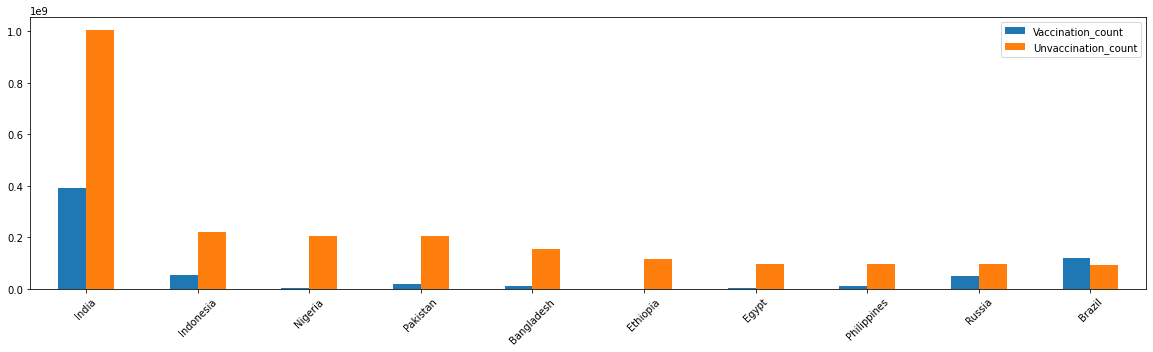

<Figure size 432x288 with 0 Axes>

In [39]:
Vaccinated_and_unvaccinated = main_covid_df[['Country',"Vaccination_count","Unvaccination_count"]].sort_values(['Unvaccination_count'], ascending = False).head(10)
multi_plot = Vaccinated_and_unvaccinated.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(Vaccinated_and_unvaccinated["Country"], rotation=45)

plt.show()
plt.tight_layout()



## Top 10 High covid cases countries

In [55]:
most_dailycases_df = main_covid_df.sort_values(['Cases'], ascending = False).head(10)
most_dailycases_df['Rank'] = range(1,11,1)
most_dailycases_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
170,1,USA,38.0000,-97.0000
73,2,India,20.0000,77.0000
23,3,Brazil,-10.0000,-55.0000
131,4,Russia,60.0000,100.0000
57,5,France,46.0000,2.0000
167,6,Turkey,39.0000,35.0000
169,7,UK,54.0000,-2.0000
6,8,Argentina,-34.0000,-64.0000
35,9,Colombia,4.0000,-72.0000
79,10,Italy,42.8333,12.8333


In [42]:

loc = most_dailycases_df[["Latitude", "Longitude"]]
Daily_New_case = most_dailycases_df['Cases']

In [57]:
fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Daily_New_case, dissipating=False, point_radius=8)
fig.add_layer(heat)

info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cases_info = [info_box_template.format(**row) for index, row in most_dailycases_df.iterrows()]
locations = most_dailycases_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = cases_info)
fig.add_layer(marker)

fig



Figure(layout=FigureLayout(height='420px'))

## Total_Cases and Recovered cases plot by region

In [44]:
region = main_covid_df.groupby("Continent").sum().reset_index()
region.head(2)

,Continent,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Unvaccination_count
0,Africa,6050908.0,154418.0,5225855.0,5.635662e+07,152.0603,836.8736,1295627558,1.239271e+09
1,Asia,57713796.0,822544.0,54425184.0,2.215321e+09,1152.7375,3418.3248,4577564448,2.362243e+09


In [45]:
region_df = region[['Continent','Cases','Deaths','Recovered','Vaccination_count','Population']]
region_df

,Continent,Cases,Deaths,Recovered,Vaccination_count,Population
0,Africa,6050908.0,154418.0,5225855.0,5.635662e+07,1295627558
1,Asia,57713796.0,822544.0,54425184.0,2.215321e+09,4577564448
2,Australia-Oceania,52930.0,1085.0,41837.0,1.150228e+07,42069654
3,Europe,49193553.5,1114387.0,27189459.5,5.782482e+08,747769997
4,North America,39356175.0,892938.0,3845190.0,4.609639e+08,592604412
5,South America,34236141.0,1044266.0,31257791.0,2.224923e+08,434254829


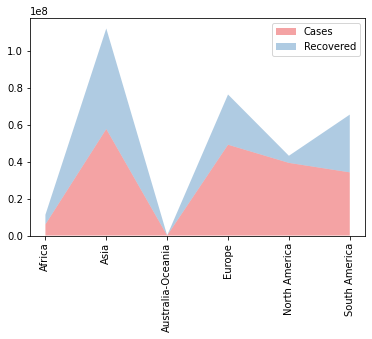

In [46]:
import seaborn as sns
pal = sns.color_palette("Set1")
plt.stackplot(region_df['Continent'],region_df["Cases"], region_df["Recovered"], labels=['Cases','Recovered'],colors=pal, alpha=0.4)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

## Overall Summary by region

<AxesSubplot:title={'center':'Stacked Bar Graph by Continent'}, xlabel='Continent'>

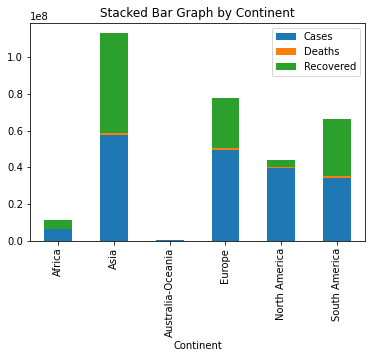

In [53]:

CCR = region[['Continent','Cases','Deaths','Recovered']]
CCR.plot(x='Continent', kind='bar', stacked=True,
        title='Stacked Bar Graph by Continent')